In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression

from statsmodels.api import OLS, add_constant, qqplot
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_pacf

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

In [11]:
df = pd.read_csv('data/temps_train_remainder.csv', index_col=0, parse_dates=True)
df.head()

,remainder
DATE,
1947-01-22,-2.394442
1947-01-23,-3.394500
1947-01-24,-4.094558
1947-01-25,-4.894616
1947-01-26,-8.294675


In [12]:
# Plot the data
def plot_remainder(df, title='Remaining Passenger Number after modelling Trend and Seasonality'):
    '''
    Custom plotting function for plotting the flights dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; defalut is True
    
    Returns
    -------
    Plots the data
    '''
    df.plot()
    plt.title(title)
    plt.ylabel('# of Passengers in 1000')
    plt.show()

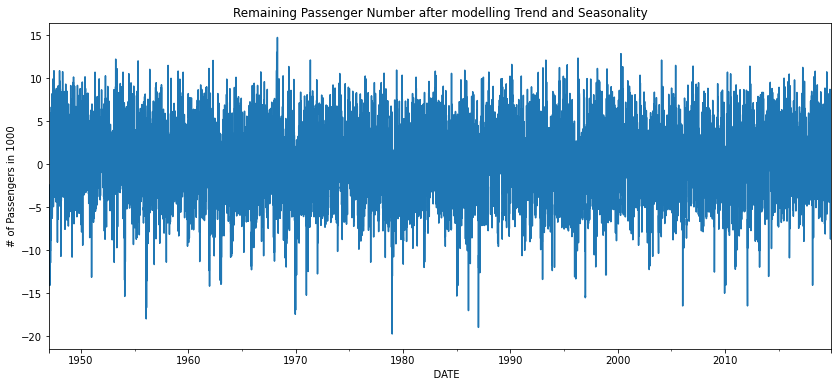

In [13]:
plot_remainder(df['remainder'])

In [14]:
df['lag1'] = df['remainder'].shift(1)
df.head()

,remainder,lag1
DATE,,
1947-01-22,-2.394442,NaN
1947-01-23,-3.394500,-2.394442
1947-01-24,-4.094558,-3.394500
1947-01-25,-4.894616,-4.094558
1947-01-26,-8.294675,-4.894616


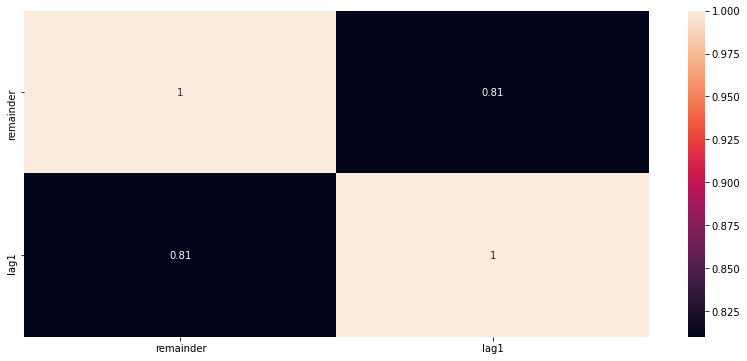

In [15]:
sns.heatmap(round(df.corr(), 2), annot=True)

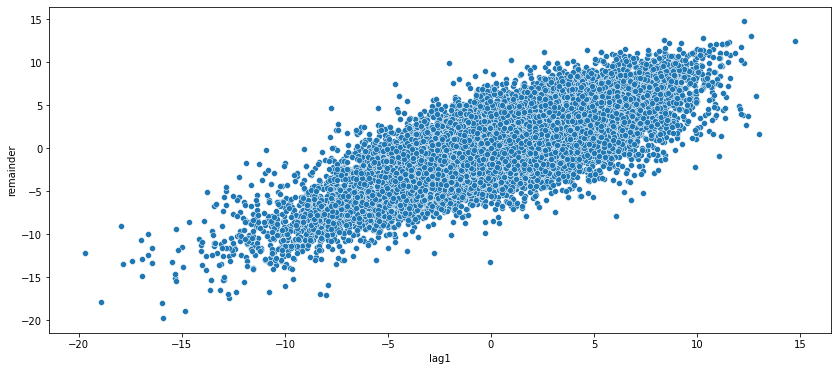

In [16]:
sns.scatterplot(x='lag1', y='remainder', data=df)
# plt.show()

In [19]:
# Drop missing values
df.dropna(inplace=True)
df.head()

,remainder,lag1
DATE,,
1947-01-23,-3.394500,-2.394442
1947-01-24,-4.094558,-3.394500
1947-01-25,-4.894616,-4.094558
1947-01-26,-8.294675,-4.894616
1947-01-27,-10.894733,-8.294675


In [20]:
# Assign X and y
X = df[['lag1']]
y = df['remainder']

In [21]:
# Create and fit the model
m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [22]:
# Create predictions
df['predictions_ar1'] = m.predict(X)
df.head()

,remainder,lag1,predictions_ar1
DATE,,,
1947-01-23,-3.394500,-2.394442,-1.928467
1947-01-24,-4.094558,-3.394500,-2.733909
1947-01-25,-4.894616,-4.094558,-3.297733
1947-01-26,-8.294675,-4.894616,-3.942096
1947-01-27,-10.894733,-8.294675,-6.680488


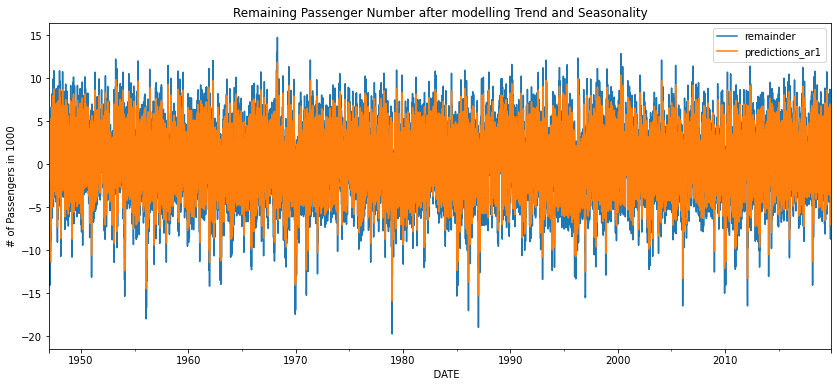

In [23]:
# Plot the original remainder and the prediction
plot_remainder(df[['remainder', 'predictions_ar1']])

In [24]:
# What is the residual compared to the remainder?
df['residual'] = df['remainder'] - df['predictions_ar1']
df.head()

,remainder,lag1,predictions_ar1,residual
DATE,,,,
1947-01-23,-3.394500,-2.394442,-1.928467,-1.466033
1947-01-24,-4.094558,-3.394500,-2.733909,-1.360649
1947-01-25,-4.894616,-4.094558,-3.297733,-1.596884
1947-01-26,-8.294675,-4.894616,-3.942096,-4.352579
1947-01-27,-10.894733,-8.294675,-6.680488,-4.214246


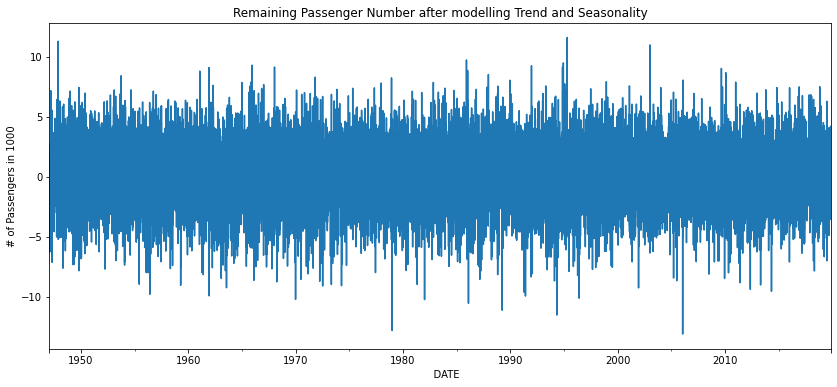

In [25]:
plot_remainder(df['residual'])

In [26]:
df['lag2'] = df['remainder'].shift(2)
df.head()

,remainder,lag1,predictions_ar1,residual,lag2
DATE,,,,,
1947-01-23,-3.394500,-2.394442,-1.928467,-1.466033,NaN
1947-01-24,-4.094558,-3.394500,-2.733909,-1.360649,NaN
1947-01-25,-4.894616,-4.094558,-3.297733,-1.596884,-3.394500
1947-01-26,-8.294675,-4.894616,-3.942096,-4.352579,-4.094558
1947-01-27,-10.894733,-8.294675,-6.680488,-4.214246,-4.894616


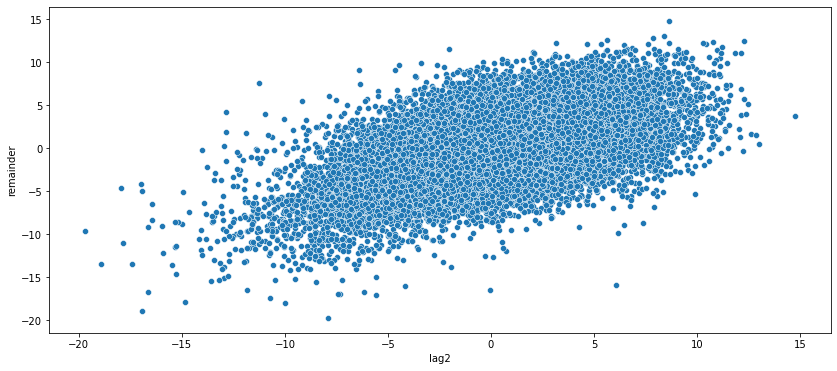

In [27]:
sns.scatterplot(x='lag2', y='remainder', data=df)

In [28]:
round(df[['remainder', 'lag1', 'lag2']].corr(), 2)

,remainder,lag1,lag2
remainder,1.00,0.81,0.60
lag1,0.81,1.00,0.81
lag2,0.60,0.81,1.00


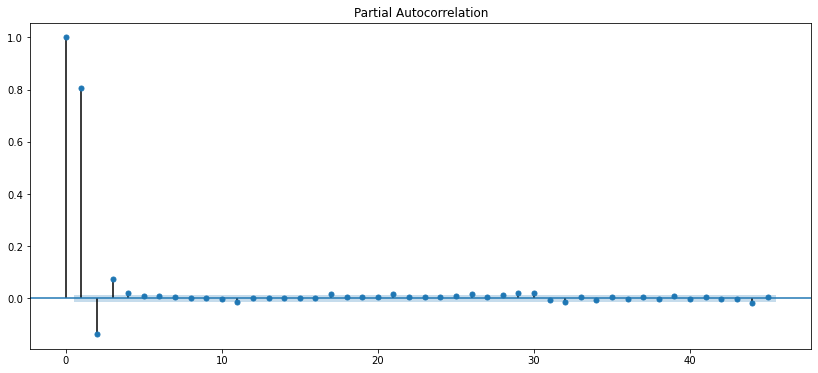

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf
fig = plot_pacf(df['remainder']);
#plt.savefig('data/TempAutocorr.png')
pickle.dump(  fig,  open('data/TempAutocorr.pickle',  'wb'))

We will choose all lags until the first sharp drop in values. In this case we will have 1 lag.